In [1]:
import datajoint as dj

In [2]:
import ephys

Connecting daveliu@mesoscale-activity.datajoint.io:3306


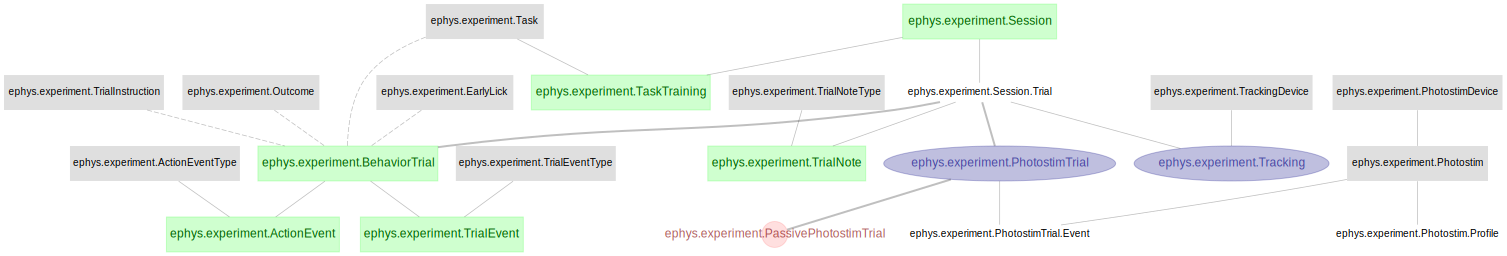

In [3]:
dj.ERD(ephys.experiment)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy as sp

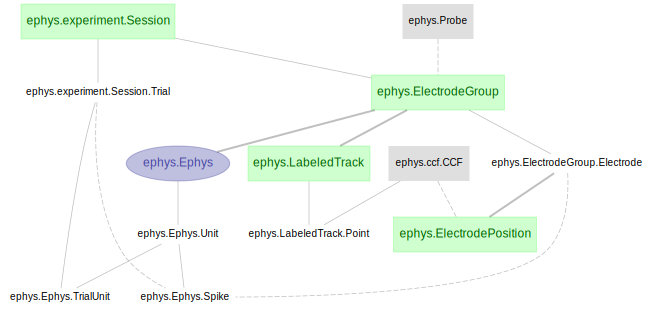

In [5]:
dj.ERD(ephys)-1

In [6]:
behaviorT=ephys.experiment.BehaviorTrial()

In [7]:
contraH=(behaviorT & 'animal = 123457' & 'session =5' & 'outcome = "hit"' & 'trial_instruction = "right"' & 'early_lick = "no early"').fetch('trial')

In [8]:
ipsiH=(behaviorT & 'animal = 123457' & 'session =5' & 'outcome = "hit"' & 'trial_instruction = "left"' & 'early_lick = "no early"').fetch('trial')

In [9]:
contraE=(behaviorT & 'animal = 123457' & 'session =5' & 'outcome = "miss"' & 'trial_instruction = "right"' & 'early_lick = "no early"').fetch('trial')

In [10]:
ipsiE=(behaviorT & 'animal = 123457' & 'session =5' & 'outcome = "miss"' & 'trial_instruction = "left"' & 'early_lick = "no early"').fetch('trial')

In [11]:
ephys1=ephys.Ephys()

In [12]:
spike=ephys1.Spike()

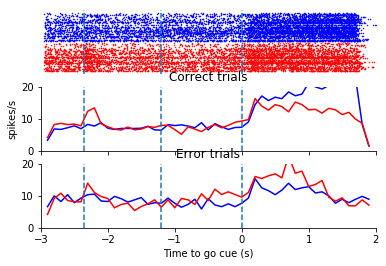

In [13]:
for x in range(130,131):
    unit1=(spike & {'unit': x} & {'animal': 123457} & 'session =5').fetch('spike_time','trial')
    binSize=0.1;
    plt.figure()
    ax=plt.subplot(311)
    plt.plot(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,unit1[1][np.in1d(unit1[1],contraH)]+500,'b.',markersize=1)
    plt.plot(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,unit1[1][np.in1d(unit1[1],ipsiH)],'r.',markersize=1)
    ax.set_axis_off()
    ax.set_xlim([-3, 2])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    ax = plt.subplot(312)
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
    plt.plot(psth[1][1:],psth[0]/len(contraH)/binSize, 'b')
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
    plt.plot(psth[1][1:],psth[0]/len(ipsiH)/binSize, 'r')
    plt.ylabel('spikes/s')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([-3, 2])
    ax.set_ylim([0, 20])
    ax.set_xticklabels([])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    plt.title('Correct trials')
    ax = plt.subplot(313)
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraE)], dtype='float')-2.95,bins=np.arange(-3,2,0.1))
    plt.plot(psth[1][1:],psth[0]/len(contraE)/binSize, 'b')
    psth=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiE)], dtype='float')-2.95,bins=np.arange(-3,2,0.1))
    plt.plot(psth[1][1:],psth[0]/len(ipsiE)/binSize, 'r')
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.set_xlim([-3, 2])
    ax.set_ylim([0, 20])
    ax.axvline(0,0,1, ls='--')
    ax.axvline(-1.2,0,1, ls='--')
    ax.axvline(-2.35,0,1, ls='--')
    plt.title('Error trials')
    plt.xlabel('Time to go cue (s)')

In [14]:
hfNeurons=[]
selectC=[]
selectI=[]
binSize=0.1
for x in range(0,400):
    unit1=(spike & {'unit': x} & {'animal': 123457} & 'session =5').fetch('spike_time','trial') # find high firing neurons
    if len(unit1[0])/5/500>5:
        hfNeurons=np.append(hfNeurons, x)
        psthC=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
        psthI=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize)) 
        if len(unit1[0][np.in1d(unit1[1],contraH[0:400])]) > len(unit1[0][np.in1d(unit1[1],ipsiH[0:400])]):
            if len(selectC) == 0:
                selectC=(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectC) != 0:
                selectC=np.vstack((selectC, (psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))
        elif len(unit1[0][np.in1d(unit1[1],contraH[0:400])]) < len(unit1[0][np.in1d(unit1[1],ipsiH[0:400])]):
            if len(selectI) == 0:
                selectI=(psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectI) != 0:
                selectI=np.vstack((selectI, (psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))

In [15]:
len(selectC[1])

49

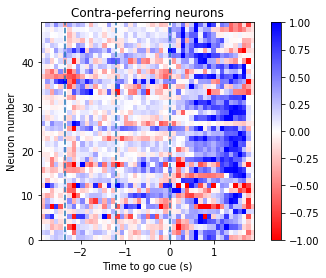

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(selectC[:][:],vmin=-1, vmax=1, extent=[psthC[1][1],psthC[1][-1],0, len(selectC[:][1])])
plt.colorbar()
plt.set_cmap('bwr_r')
ax.set_aspect(0.1)
plt.title('Contra-peferring neurons')
plt.ylabel('Neuron number')
plt.xlabel('Time to go cue (s)')
ax.axvline(0,0,1, ls='--')
ax.axvline(-1.2,0,1, ls='--')
ax.axvline(-2.35,0,1, ls='--')

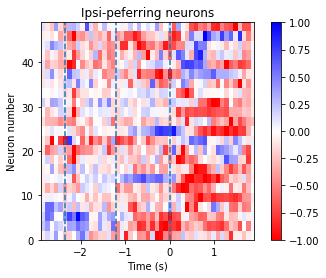

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.imshow(selectI[:][:],vmin=-1, vmax=1, extent=[psthI[1][1],psthI[1][-1],0, len(selectI[:][1])])
plt.colorbar()
plt.set_cmap('bwr_r')
ax.set_aspect(0.1)
plt.title('Ipsi-peferring neurons')
plt.ylabel('Neuron number')
plt.xlabel('Time (s)')
ax.axvline(0,0,1, ls='--')
ax.axvline(-1.2,0,1, ls='--')
ax.axvline(-2.35,0,1, ls='--')

In [18]:
sC=np.empty(len(hfNeurons))
sE=np.empty(len(hfNeurons))
for x in range(0,len(hfNeurons)): # choice related activity
    unit1=(spike & {'unit': hfNeurons[x]} & {'animal': 123457} & 'session =5').fetch('spike_time','trial') # find high firing neurons
    spkC=np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95
    spkI=np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95
    spkCE=np.asarray(unit1[0][np.in1d(unit1[1],contraE)], dtype='float')-2.95
    spkIE=np.asarray(unit1[0][np.in1d(unit1[1],ipsiE)], dtype='float')-2.95
    sC[x]=(len(spkC[(spkC<2) & (spkC>0)])/len(contraH)-len(spkI[(spkI<2) & (spkI>0)])/len(ipsiH))/2
    sE[x]=(len(spkCE[(spkCE<2) & (spkCE>0)])/len(contraE)-len(spkIE[(spkIE<2) & (spkIE>0)])/len(ipsiE))/2
    

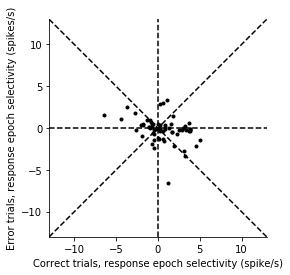

In [19]:
ax=plt.subplot(111)
plt.plot(sC,sE,'k.',[-13, 13], [-13, 13],'k--',[-13, 13], [13, -13],'k--')
plt.xlabel('Correct trials, response epoch selectivity (spike/s)')
plt.ylabel('Error trials, response epoch selectivity (spikes/s)')
plt.xlim(-13, 13)
plt.ylim(-13, 13)
plt.gca().set_aspect('equal', adjustable='box')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
ax.axvline(0,0,1, ls='--', color='k')
ax.axhline(0,0,1, ls='--', color='k')

In [20]:
np.corrcoef(sC, sE)

array([[ 1.        , -0.32519055],
       [-0.32519055,  1.        ]])

In [21]:
from scipy.stats import linregress
linregress(sC, sE)

LinregressResult(slope=-0.21440829133926351, intercept=-0.052673554105986842, rvalue=-0.3251905494159113, pvalue=0.0082136646330913336, stderr=0.078553063800597733)

In [22]:
hfNeurons=[]
selectC=[]
selectI=[]
binSize=0.1
for x in range(1,512):
    unit1=(spike & {'unit': x} & {'animal': 123458} & 'session =14').fetch('spike_time','trial') # find high firing neurons
    if len(unit1[0])/5/500>4:
        hfNeurons=np.append(hfNeurons, x)
        psthC=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],contraH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize))
        psthI=np.histogram(np.asarray(unit1[0][np.in1d(unit1[1],ipsiH)], dtype='float')-2.95,bins=np.arange(-3,2,binSize)) 
        if len(unit1[0][np.in1d(unit1[1],contraH[0:100])]) > len(unit1[0][np.in1d(unit1[1],ipsiH[0:100])]):
            if len(selectC) == 0:
                selectC=(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectC) != 0:
                selectC=np.vstack((selectC, (psthC[0]/len(contraH)-psthI[0]/len(ipsiH))/max(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))
        elif len(unit1[0][np.in1d(unit1[1],contraH[0:100])]) < len(unit1[0][np.in1d(unit1[1],ipsiH[0:100])]):
            if len(selectI) == 0:
                selectI=(psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))
            elif len(selectI) != 0:
                selectI=np.vstack((selectI, (psthI[0]/len(ipsiH)-psthC[0]/len(contraH))/min(psthC[0]/len(contraH)-psthI[0]/len(ipsiH))))# coding direction

In [23]:
selectC

[]

In [24]:
# noise correlation

In [1]:
import h5py
import numpy as np


In [9]:
file="C:\\Users\liul.HHMI\Desktop\\tw5ap_imec3_opt3_jrc.mat"
f = h5py.File(file,'r')

In [35]:
trWav_raw_clu = f['S_clu']['trWav_raw_clu']

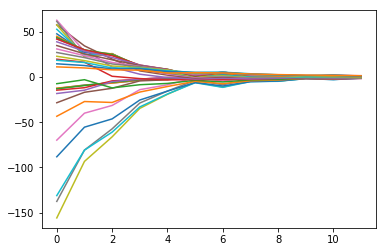

In [54]:
plt.plot(trWav_raw_clu[0][:])

In [84]:
trWav_raw_clu[0]

array([[ -1.26818066e+01,  -1.23208523e+01,  -1.30239849e+01,
         -1.45403976e+01,  -1.82364826e+01,  -2.84575577e+01,
         -6.98669281e+01,  -1.37709152e+02,  -1.55990372e+02,
         -1.31277863e+02,  -8.82888412e+01,  -4.34388046e+01,
         -7.36380816e+00,   1.97557220e+01,   4.21596069e+01,
          5.77549324e+01,   6.28853912e+01,   6.15588417e+01,
          5.77502480e+01,   5.28986702e+01,   4.78549347e+01,
          4.51197624e+01,   4.36596031e+01,   4.21666489e+01,
          3.90119781e+01,   3.48635330e+01,   3.11182022e+01,
          2.71900902e+01,   2.30158577e+01,   1.85275917e+01,
          1.46416426e+01,   1.12643127e+01],
       [ -8.90135765e+00,  -9.11228657e+00,  -9.39824581e+00,
         -1.18146305e+01,  -1.45779133e+01,  -1.68794994e+01,
         -4.00263557e+01,  -8.08896332e+01,  -9.34146500e+01,
         -8.09248199e+01,  -5.55138588e+01,  -2.71123047e+01,
         -2.95293331e+00,   1.63595791e+01,   3.00189610e+01,
          3.45072250e+01,

In [93]:
a= np.concatenate((trWav_raw_clu[0:1][:][:],trWav_raw_clu), axis=0)

In [97]:
a[2][0]

array([   2.47392654,    8.49033546,   23.398983  ,   26.15539932,
         16.01471901,    1.67452097,  -27.55097198, -118.94688416,
       -173.67588806, -110.14802551,  -40.76993561,   -4.09272909,
         11.34799767,   19.03849792,   23.89730263,   29.42576408,
         31.6189537 ,   31.00901794,   28.87809372,   26.5213604 ,
         23.75714874,   21.88060379,   19.98066902,   18.6699276 ,
         16.84008789,   16.03031158,   15.17636776,   14.78705406,
         14.37957287,   12.35246658,   11.36097908,   10.02427292], dtype=float32)

In [45]:
np.(1,4)

array([1, 2, 3])